# Process discovery and conformace checkig on real data
## pm4py

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pm4py

In [2]:
import os
print(os.getcwd())

/home/vicentamen/Documents/Intelligent_Systems/SJK013-Process_Mining


### Import dataset to pandas

In [3]:
# Importing the dataset
df = pd.read_csv('dataset/dataset_complete.csv')
df_group1 = pd.read_csv('dataset/group1_complete.csv')
df_group2 = pd.read_csv('dataset/group2_complete.csv')
df_group3 = pd.read_csv('dataset/group3_complete.csv')
df_group3

,PARTICIPANT,T,SC,ET,ACTION_DH,timestamp
0,2.0,102.0,1,1.0,Reaching,2023-01-02 00:01:00
1,2.0,102.0,1,2.0,Transporting,2023-01-02 00:02:00
2,2.0,102.0,1,3.0,Releasing,2023-01-02 00:03:00
3,2.0,102.0,1,4.0,Reaching,2023-01-02 00:04:00
4,2.0,102.0,1,5.0,Transporting,2023-01-02 00:05:00
...,...,...,...,...,...,...
3579,30.0,348.0,2,610.0,other,2023-01-30 10:10:00
3580,30.0,349.0,5,611.0,Reaching,2023-01-30 10:11:00
3581,30.0,349.0,5,612.0,Holding,2023-01-30 10:12:00
3582,30.0,349.0,5,613.0,other,2023-01-30 10:13:00


In [4]:
df

,PARTICIPANT,T,SC,ET,ACTION_DH,timestamp
0,1.0,102.0,1,1.0,Reaching,2023-01-01 00:01:00
1,1.0,102.0,1,2.0,Transporting,2023-01-01 00:02:00
2,1.0,102.0,1,3.0,Releasing,2023-01-01 00:03:00
3,1.0,102.0,1,4.0,Reaching,2023-01-01 00:04:00
4,1.0,102.0,1,5.0,Transporting,2023-01-01 00:05:00
...,...,...,...,...,...,...
15818,30.0,348.0,2,610.0,other,2023-01-30 10:10:00
15819,30.0,349.0,5,611.0,Reaching,2023-01-30 10:11:00
15820,30.0,349.0,5,612.0,Holding,2023-01-30 10:12:00
15821,30.0,349.0,5,613.0,other,2023-01-30 10:13:00


In [4]:
# Multi column label encoding
df['case_id'] = df['PARTICIPANT'].astype(str) + ':' + df['T'].astype(str)
df_group1['case_id'] = df_group1['PARTICIPANT'].astype(str) + ':' + df_group1['T'].astype(str)
df_group2['case_id'] = df_group2['PARTICIPANT'].astype(str) + ':' + df_group2['T'].astype(str)
df_group3['case_id'] = df_group3['PARTICIPANT'].astype(str) + ':' + df_group3['T'].astype(str)
df

,PARTICIPANT,T,SC,ET,ACTION_DH,timestamp,case_id
0,1.0,102.0,1,1.0,Reaching,2023-01-01 00:01:00,1.0:102.0
1,1.0,102.0,1,2.0,Transporting,2023-01-01 00:02:00,1.0:102.0
2,1.0,102.0,1,3.0,Releasing,2023-01-01 00:03:00,1.0:102.0
3,1.0,102.0,1,4.0,Reaching,2023-01-01 00:04:00,1.0:102.0
4,1.0,102.0,1,5.0,Transporting,2023-01-01 00:05:00,1.0:102.0
...,...,...,...,...,...,...,...
15818,30.0,348.0,2,610.0,other,2023-01-30 10:10:00,30.0:348.0
15819,30.0,349.0,5,611.0,Reaching,2023-01-30 10:11:00,30.0:349.0
15820,30.0,349.0,5,612.0,Holding,2023-01-30 10:12:00,30.0:349.0
15821,30.0,349.0,5,613.0,other,2023-01-30 10:13:00,30.0:349.0


### pm4py event log from dataframe

In [5]:
# Create a pm4py event log from the dataset
event_log = pm4py.format_dataframe(df, case_id='case_id', activity_key='ACTION_DH', timestamp_key='timestamp')
event_log = pm4py.convert_to_event_log(event_log)

In [6]:
event_log_g1 = pm4py.format_dataframe(df_group1, case_id='case_id', activity_key='ACTION_DH', timestamp_key='timestamp')
event_log_g1 = pm4py.convert_to_event_log(event_log_g1)

event_log_g2 = pm4py.format_dataframe(df_group2, case_id='case_id', activity_key='ACTION_DH', timestamp_key='timestamp')
event_log_g2 = pm4py.convert_to_event_log(event_log_g2)

event_log_g3 = pm4py.format_dataframe(df_group3, case_id='case_id', activity_key='ACTION_DH', timestamp_key='timestamp')
event_log_g3 = pm4py.convert_to_event_log(event_log_g3)

In [7]:
event_log

[{'attributes': {'concept:name': '1.0:102.0'}, 'events': [{'PARTICIPANT': 1.0, 'T': 102.0, 'SC': '1', 'ET': 1.0, 'ACTION_DH': 'Reaching', 'timestamp': Timestamp('2023-01-01 00:01:00+0000', tz='UTC'), 'case_id': '1.0:102.0', 'concept:name': 'Reaching', 'time:timestamp': Timestamp('2023-01-01 00:01:00+0000', tz='UTC'), '@@index': 0, '@@case_index': 0}, '..', {'PARTICIPANT': 1.0, 'T': 102.0, 'SC': '1', 'ET': 6.0, 'ACTION_DH': 'Releasing', 'timestamp': Timestamp('2023-01-01 00:06:00+0000', tz='UTC'), 'case_id': '1.0:102.0', 'concept:name': 'Releasing', 'time:timestamp': Timestamp('2023-01-01 00:06:00+0000', tz='UTC'), '@@index': 5, '@@case_index': 0}]}, '....', {'attributes': {'concept:name': '9.0:350.0'}, 'events': [{'PARTICIPANT': 9.0, 'T': 350.0, 'SC': '-', 'ET': 614.0, 'ACTION_DH': 'Pushing', 'timestamp': Timestamp('2023-01-09 10:14:00+0000', tz='UTC'), 'case_id': '9.0:350.0', 'concept:name': 'Pushing', 'time:timestamp': Timestamp('2023-01-09 10:14:00+0000', tz='UTC'), '@@index': 15822

### pm4py process discovery

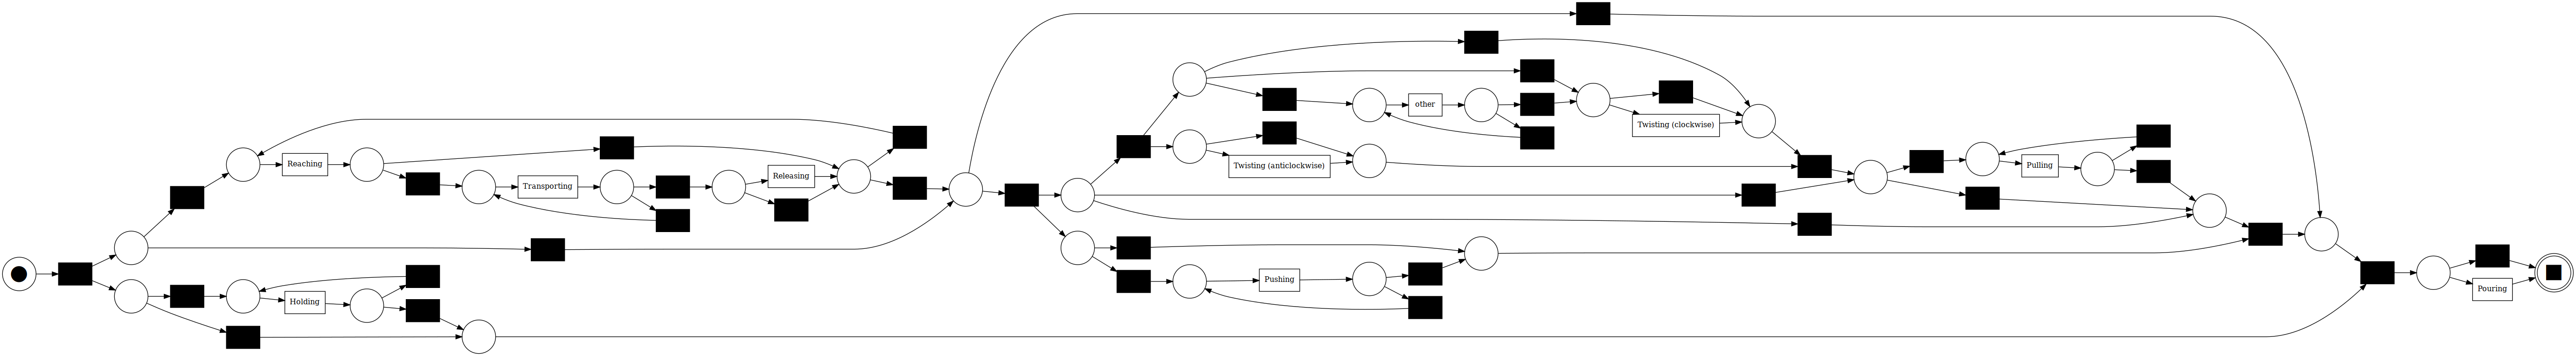

In [8]:
# Apply alpha miner to discover a process model
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(event_log)
#net, initial_marking, final_marking = pm4py.discover_petri_net_alpha_plus(event_log)

# Visualize the process model
pm4py.view_petri_net(net, initial_marking, final_marking)

In [ ]:
pm4py.vis.save_vis_petri_net(net, initial_marking, final_marking, "process_model.png")

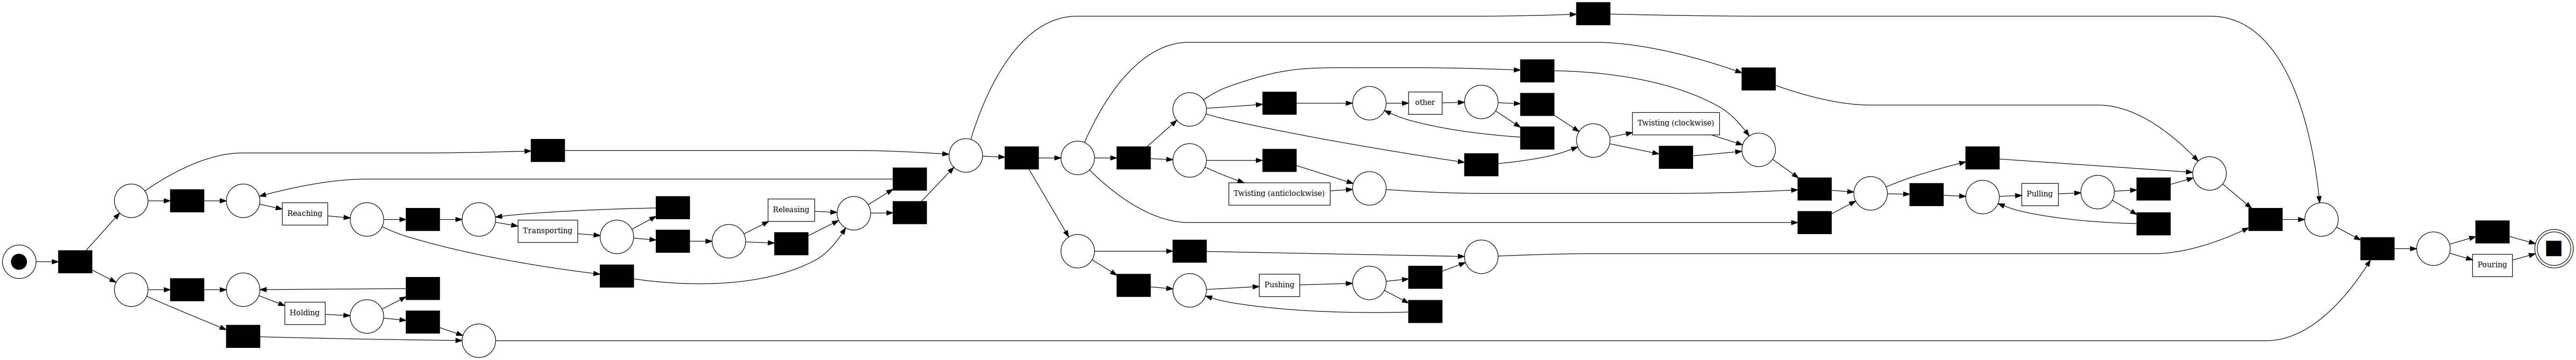

In [14]:
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(event_log_g1)
pm4py.view_petri_net(net, initial_marking, final_marking)

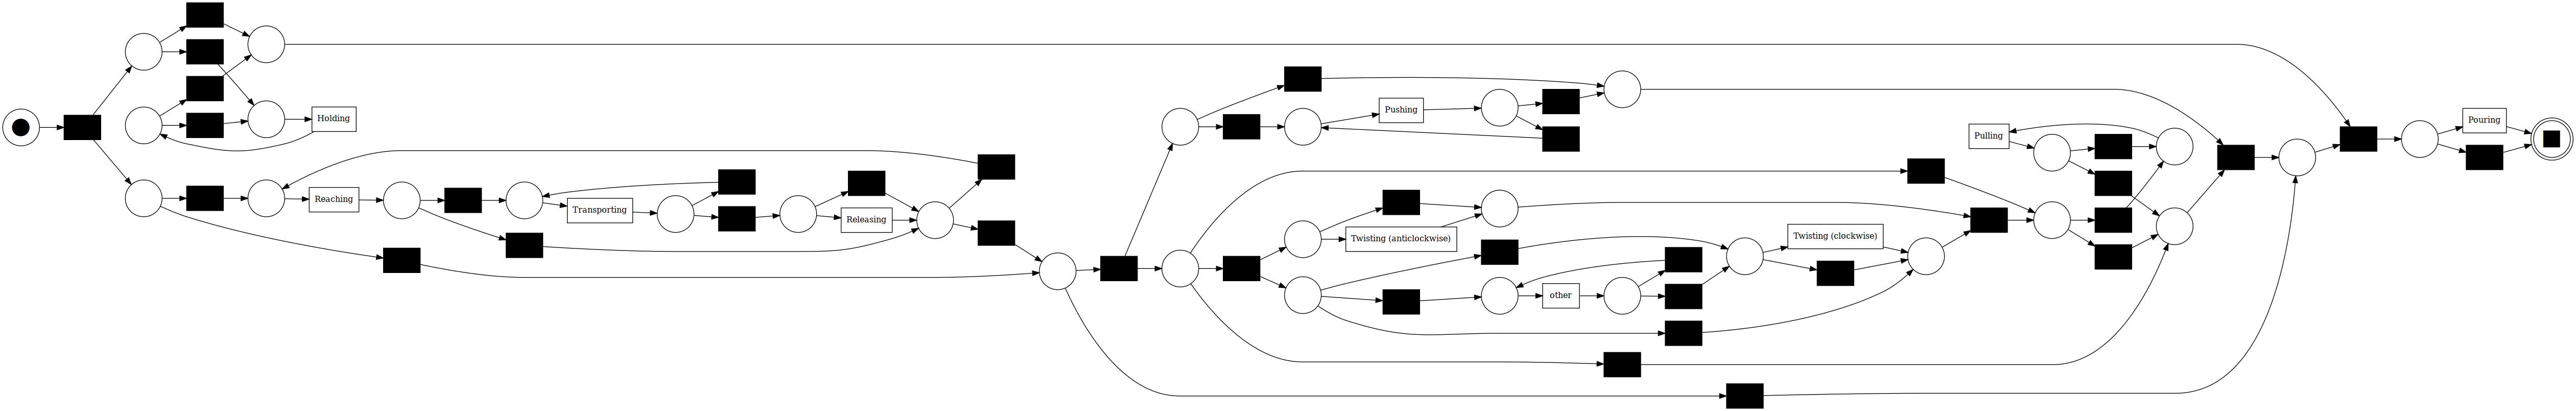

In [10]:
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(event_log_g3)
pm4py.view_petri_net(net, initial_marking, final_marking)

### pm4py Conformane checking

In [12]:
# Apply the token replay algorithm to replay the event log on the process model
replayed_traces = pm4py.fitness_token_based_replay(event_log_g2, net, initial_marking, final_marking)

# Print the fitness
print(f"Fitness: {replayed_traces['perc_fit_traces']:.2f}%")
print(f"Trace fitness: {replayed_traces['average_trace_fitness']:.2f}")
print(f"Log fitness: {replayed_traces['log_fitness']:.2f}")
print(f"Precision: {replayed_traces['percentage_of_fitting_traces']:.2f}")


""" The fitness is always going to be 100% since the conformance checking we are executing is from the model we have built from the eventlog """

/home/vicentamen/miniconda3/envs/pm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


replaying log with TBR, completed traces :: 100%|██████████| 29/29 [00:00<00:00, 635.07it/s]

Fitness: 100.00%
Trace fitness: 1.00
Log fitness: 1.00
Precision: 100.00


' The fitness is always going to be 100% since the conformance checking we are executing is from the model we have built from the eventlog '

In [15]:
replayed_traces_g3 = pm4py.fitness_token_based_replay(event_log_g3, net, initial_marking, final_marking)

# Print the fitness
print(f"Fitness: {replayed_traces_g3['perc_fit_traces']:.2f}%")
print(f"Trace fitness: {replayed_traces_g3['average_trace_fitness']:.2f}")
print(f"Log fitness: {replayed_traces_g3['log_fitness']:.2f}")
print(f"Precision: {replayed_traces_g3['percentage_of_fitting_traces']:.2f}")

replaying log with TBR, completed traces :: 100%|██████████| 29/29 [00:00<00:00, 871.65it/s]

Fitness: 100.00%
Trace fitness: 1.00
Log fitness: 1.00
Precision: 100.00


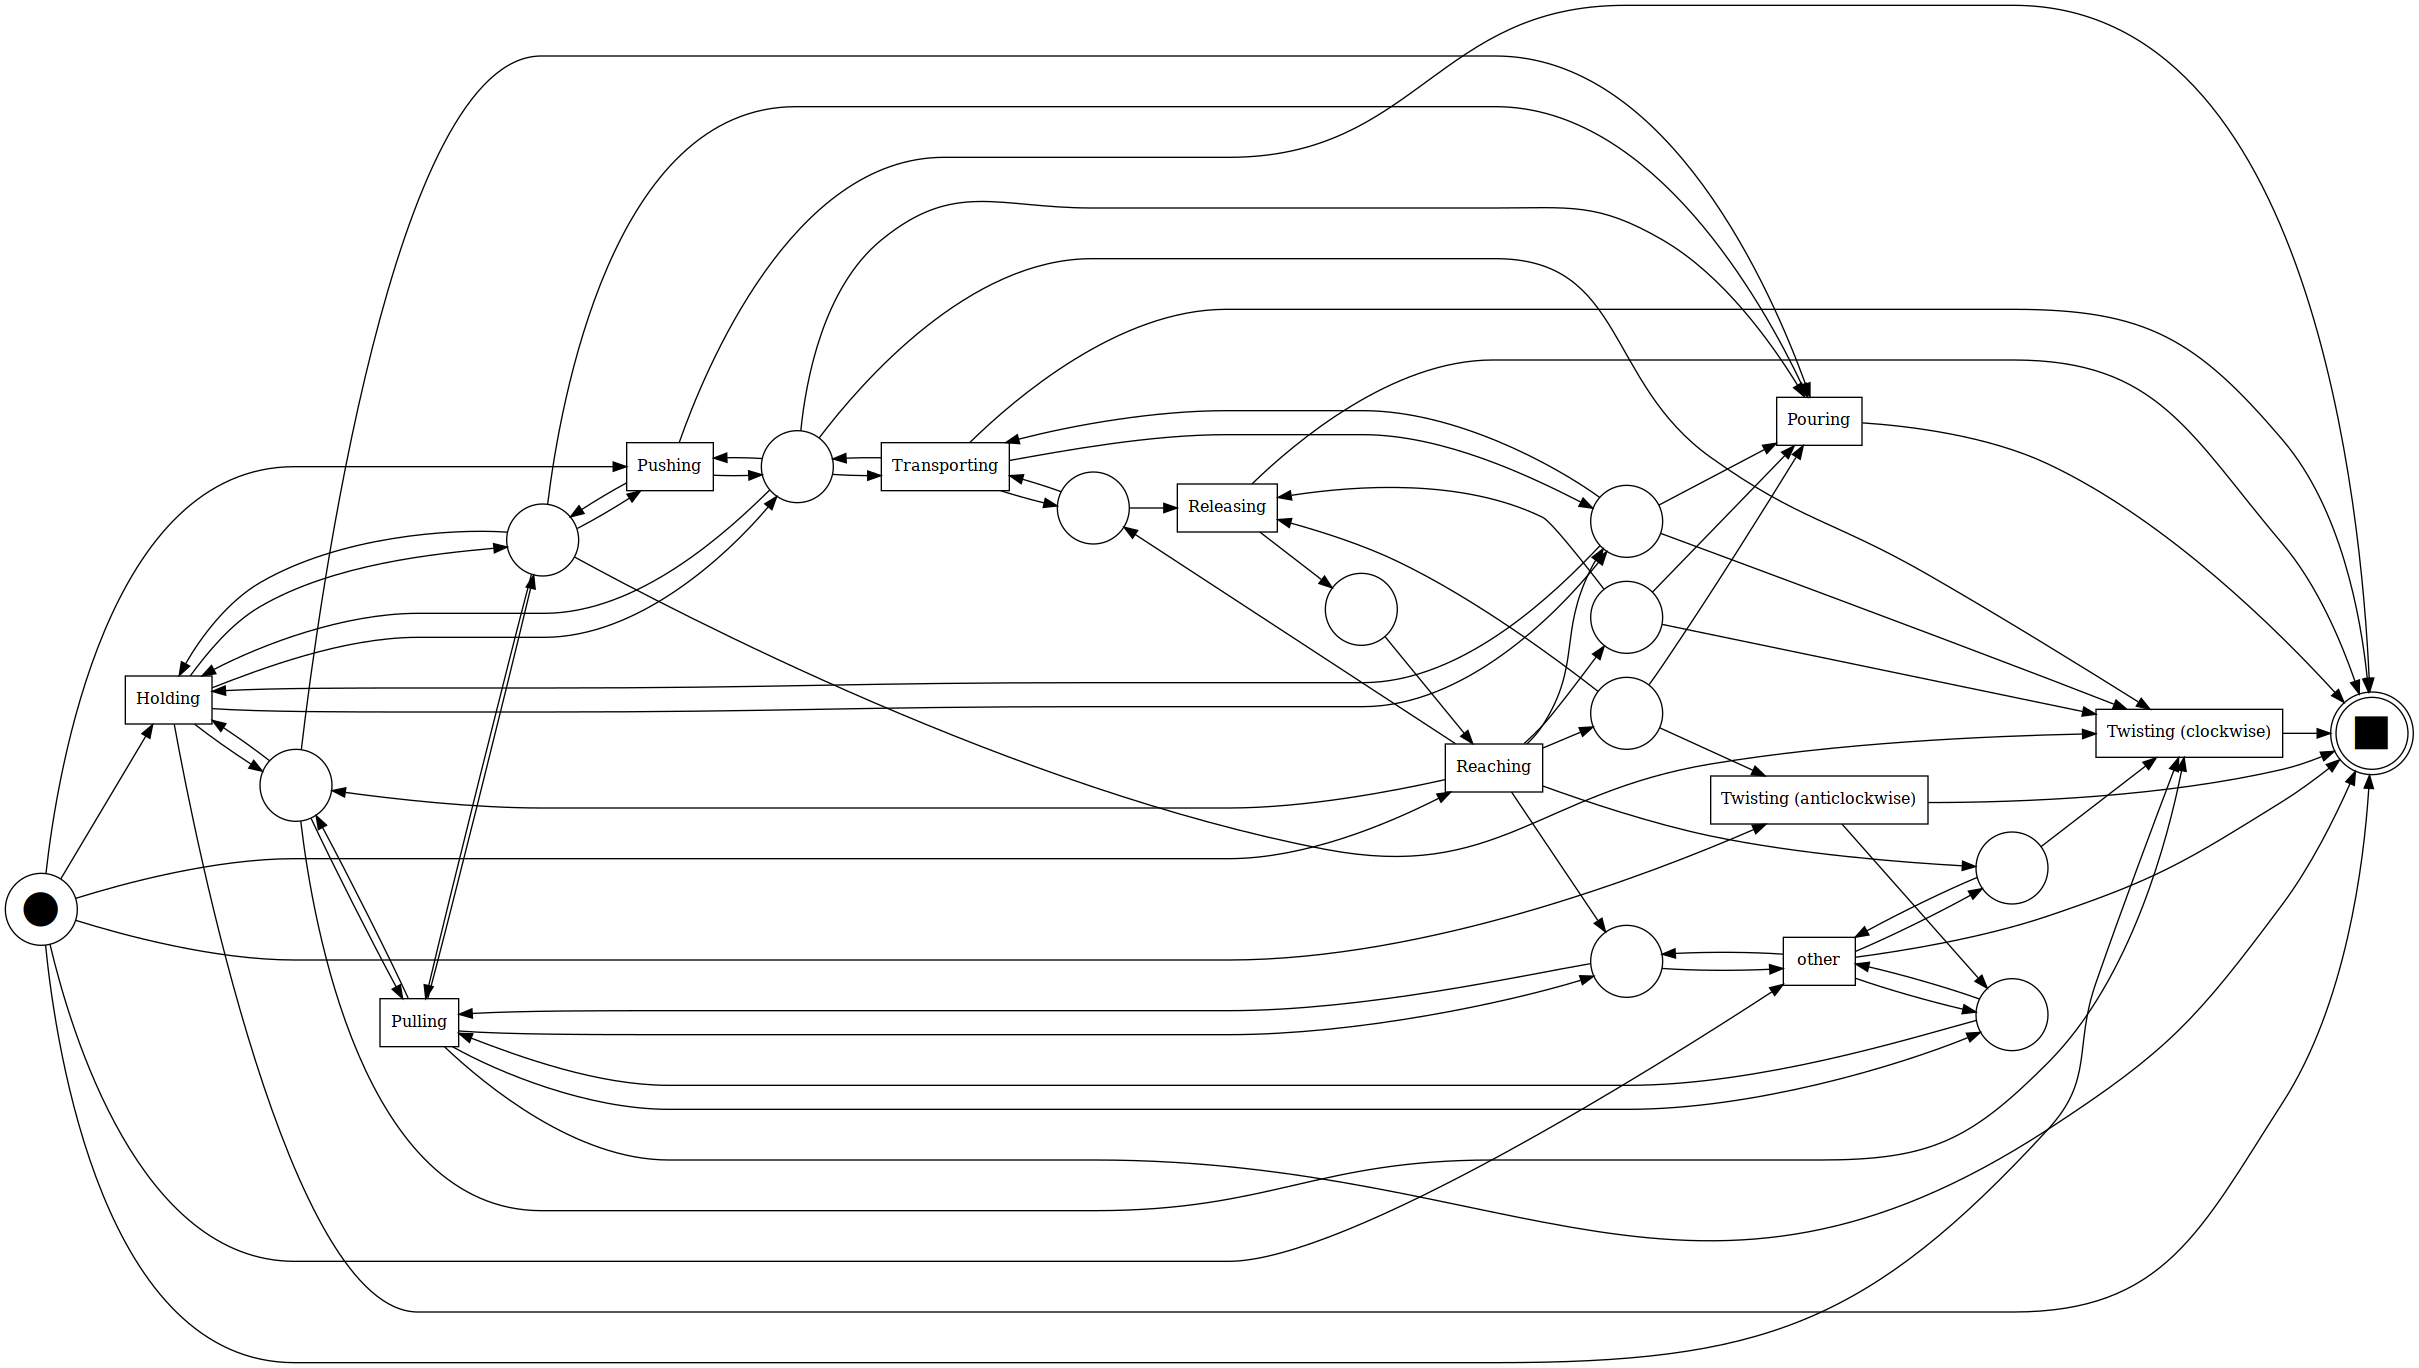

In [20]:
### Import petrinet from pom - computed with alphaminer++
net_prom, initial_marking_prom, final_marking_prom = pm4py.read_pnml("outputs/petri_task_participant_prom.pnml")
# Visualize petri
pm4py.view_petri_net(net_prom, initial_marking_prom, final_marking_prom)

In [21]:
replayed_traces_pm = pm4py.fitness_token_based_replay(event_log, net_prom, initial_marking_prom, final_marking_prom)

# Print the fitness
print(f"Fitness: {replayed_traces_pm['perc_fit_traces']:.2f}%")
print(f"Trace fitness: {replayed_traces_pm['average_trace_fitness']:.2f}")
print(f"Log fitness: {replayed_traces_pm['log_fitness']:.2f}")
print(f"Precision: {replayed_traces_pm['percentage_of_fitting_traces']:.2f}")

replaying log with TBR, completed traces ::   0%|          | 0/29 [00:00<?, ?it/s]

replaying log with TBR, completed traces :: 100%|██████████| 29/29 [00:00<00:00, 336.39it/s]

Fitness: 0.00%
Trace fitness: 0.58
Log fitness: 0.60
Precision: 0.00


/tmp/ipykernel_43874/3068615019.py:2: DeprecatedWarning: discover_petri_net_alpha_plus is deprecated as of 2.3.0 and will be removed in 3.0.0. this method will be removed in a future release.
  net, initial_marking, final_marking = pm4py.discover_petri_net_alpha_plus(event_log)


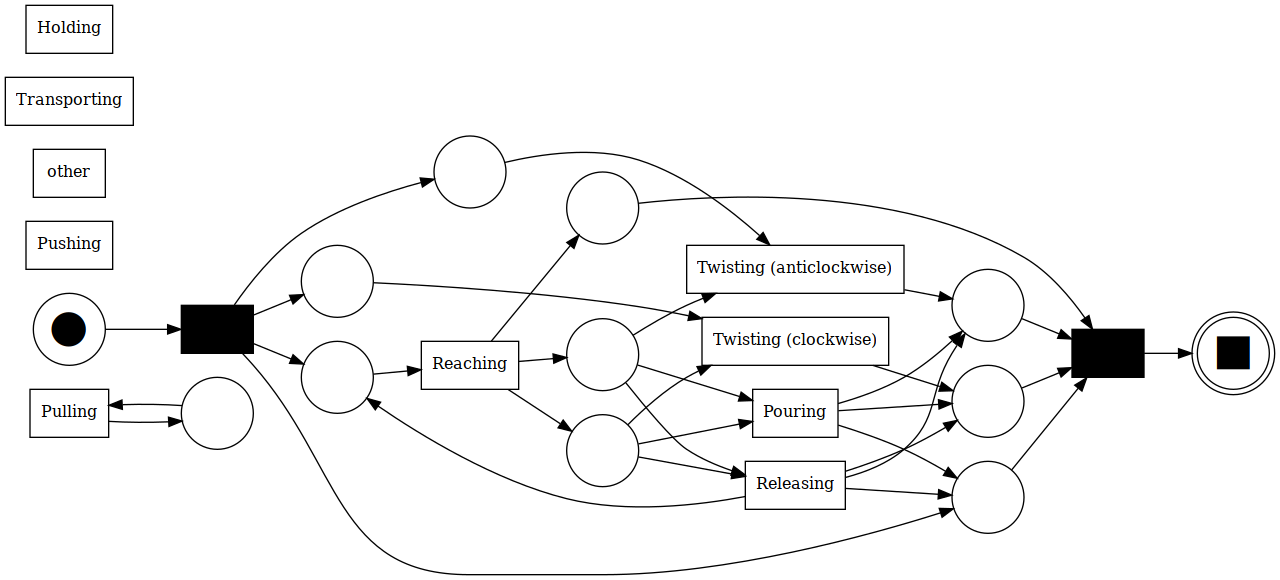

In [22]:
# Compute petri with alpha miner plus
net, initial_marking, final_marking = pm4py.discover_petri_net_alpha_plus(event_log)
# Visualize petri
pm4py.view_petri_net(net, initial_marking, final_marking)

In [23]:
replayed_traces_am = pm4py.fitness_token_based_replay(event_log, net, initial_marking, final_marking)

# Print the fitness
print(f"Fitness: {replayed_traces_am['perc_fit_traces']:.2f}%")
print(f"Trace fitness: {replayed_traces_am['average_trace_fitness']:.2f}")
print(f"Log fitness: {replayed_traces_am['log_fitness']:.2f}")
print(f"Precision: {replayed_traces_am['percentage_of_fitting_traces']:.2f}")

replaying log with TBR, completed traces ::   0%|          | 0/29 [00:00<?, ?it/s]

replaying log with TBR, completed traces :: 100%|██████████| 29/29 [00:00<00:00, 375.22it/s]

Fitness: 6.86%
Trace fitness: 0.66
Log fitness: 0.73
Precision: 6.86
